In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import glob
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
from sklearn.mixture import GaussianMixture

In [3]:
import pandas as pd
import glob

# set paths to folders containing CSV files
path = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/"

# combine data_po files into df1
files_po = glob.glob(path + "*data_po*.csv")
df1 = pd.DataFrame()
for file in files_po:
    with open(file, 'r') as f:
        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df1 = pd.concat([df1, temp_df], axis=0)

# rename the columns in df1 and convert to float
df1.columns = [i for i in range(df1.shape[1])]
df1 = df1.rename(columns={0: 'Fault'})
df1 = df1.astype(float)

# combine data_pdmp files into df2
files_pdmp = glob.glob(path + "*data_pdmp*.csv")
df2 = pd.DataFrame()
for file in files_pdmp:
    with open(file, 'r') as f:

        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df2 = pd.concat([df2, temp_df], axis=0)

# rename the columns in df2 and convert to float
df2.columns = [i for i in range(df2.shape[1])]
df2 = df2.rename(columns={0: 'Fault'})
df2 = df2.astype(float)

# combine data_pin files into df3
files_pin = glob.glob(path + "*data_pin*.csv")
df3 = pd.DataFrame()
for file in files_pin:
    with open(file, 'r') as f:

        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df3 = pd.concat([df3, temp_df], axis=0)

# rename the columns in df3 and convert to float
df3.columns = [i for i in range(df3.shape[1])]
df3 = df3.rename(columns={0: 'Fault'})
df3 = df3.astype(float)


In [4]:
# Assign Fault label to new df y_true

y_true1 = df1["Fault"]
y_true2 = df2["Fault"]
y_true3 = df3["Fault"]

In [5]:
# del fault label column 

df1.columns = df1.columns.astype(str)
del df1[df1.columns[0]]

df2.columns = df2.columns.astype(str)
del df2[df2.columns[0]]

df3.columns = df3.columns.astype(str)
del df3[df3.columns[0]]

In [6]:
# Perform PCA on the data

pca1 = PCA(n_components=2)
principal_components1 = pca1.fit_transform(df1)

pca2 = PCA(n_components=2)
principal_components2 = pca2.fit_transform(df2)

pca3 = PCA(n_components=2)
principal_components3 = pca3.fit_transform(df3)

In [7]:
# Create a DataFrame df_pca with the principal components and cluster labels

df_pca1 = pd.DataFrame(data=principal_components1, columns=['PC1', 'PC2'], index=df1.index)

df_pca2 = pd.DataFrame(data=principal_components2, columns=['PC1', 'PC2'], index=df2.index)

df_pca3 = pd.DataFrame(data=principal_components3, columns=['PC1', 'PC2'], index=df3.index)

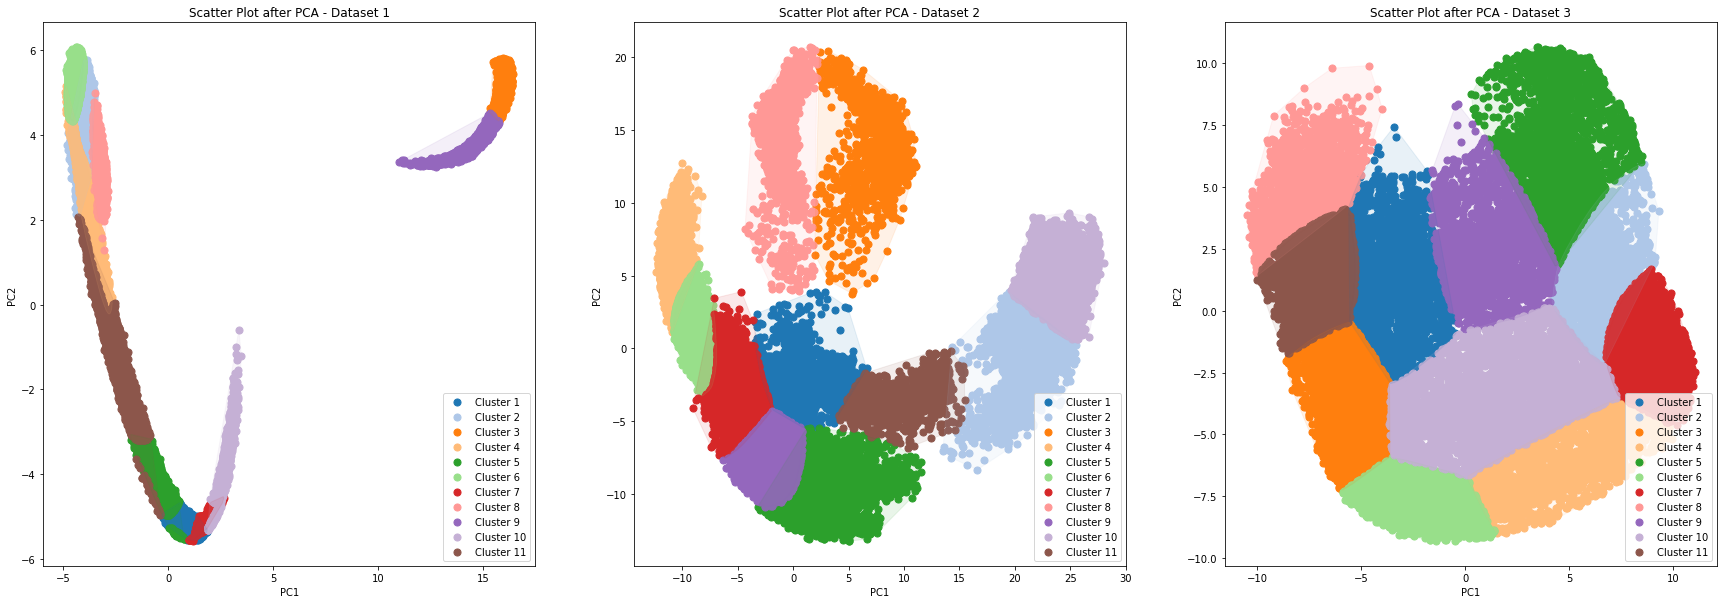

In [8]:
def plot_clusters(df_list, num_clusters=11):
    # Create a list of unique colors for each cluster
    colors = sns.color_palette('tab20', num_clusters)

    fig, axs = plt.subplots(1, len(df_list), figsize=(10*len(df_list), 10))

    # Create a separate scatter plot for each dataframe
    for j, df in enumerate(df_list):
        gmm = GaussianMixture(n_components=num_clusters)
        gmm.fit(df[['PC1', 'PC2']])
        cluster_labels = gmm.predict(df[['PC1', 'PC2']])
        df['cluster'] = cluster_labels
        for i in range(num_clusters):
            axs[j].scatter(df.loc[df['cluster']==i, 'PC1'], df.loc[df['cluster']==i, 'PC2'], color=colors[i], s=50, label=f'Cluster {i+1}')
            axs[j].set_title(f'Scatter Plot after PCA - Dataset {j+1}')
            axs[j].set_xlabel('PC1')
            axs[j].set_ylabel('PC2')
            axs[j].legend(loc='lower right')

        # Draw convex hulls
        for i in range(num_clusters):
            cluster_points = df.loc[df['cluster']==i, ['PC1', 'PC2']]
            hull = ConvexHull(cluster_points)
            axs[j].fill(cluster_points.iloc[hull.vertices, 0], cluster_points.iloc[hull.vertices, 1], color=colors[i], alpha=0.1)

    plt.show()


# Example usage with three dataframes df1, df2, df3:
plot_clusters([df_pca1, df_pca2, df_pca3], num_clusters=11)


In [9]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true1, df_pca1["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1     2    3    4    5    6    7     8    9    10
Fault                                                           
1.0      386  163     0  578  568  500  258    0     0  119  451
2.0        0    0  2014    0    0    0    0    0  1478    0    0
3.0      159  630     0  500  390  474   45  228     0    3  641
4.0      434  199     0  512  318  267  520    1     0  469  381
5.0      356  184     0  411  583  840  173    0     0   57  470
6.0       10  431     0  722   80  871    0  623     0    0  321
7.0      554   32     0  569  489   20  500    0     0  430  560
8.0      390   83     0  340  493  296  400    0     0  370  747
9.0      377  231     0  479  471  707  214    1     0  171  406
10.0     422  184     0  659  293  284  146    0     0  316  387
11.0     503  242     0  567  439  498  403    1     0  208  345


In [10]:
from sklearn.metrics import adjusted_mutual_info_score

# Calculate AMI
ami = adjusted_mutual_info_score(y_true1, df_pca1["cluster"])

# Print AMI
print("Adjusted Mutual Information:", ami)


Adjusted Mutual Information: 0.2074024428015085


In [11]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true2, df_pca2["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0     1     2     3    4    5    6     7    8     9    10
Fault                                                              
1.0        0     0     0   466  645  650  741     0  521     0    0
2.0       19     0  1298     0    0    0    0  2175    0     0    0
3.0       85     0     0   501  752  624  684     0  422     0    2
4.0      963  1073     0     0    0   33  531     0    0   291  210
5.0        0     0     0   456  498  632  850     0  638     0    0
6.0        0   907     0     0    0    0    0     0    0  2151    0
7.0        3     0     0  1032  430  633  637     0  419     0    0
8.0        7     0     0   998  724  509  347     0  518     0   16
9.0      765     0     0   173    5  635  575     0   35     0  869
10.0      14     0     0   363  489  520  838     0  467     0    0
11.0       4     0     0   552  511  650  967     0  522     0    0


In [13]:
from sklearn.metrics import adjusted_mutual_info_score

# Calculate AMI
ami = adjusted_mutual_info_score(y_true2, df_pca2["cluster"])

# Print AMI
print("Adjusted Mutual Information:", ami)


Adjusted Mutual Information: 0.3716237411281819


In [12]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true3, df_pca3["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1    2    3     4    5    6    7    8    9    10
Fault                                                          
1.0      273  245  438  289    89  252  304  372  180  258  323
2.0      484   77    0    0  1685    0    0  559  486    0  201
3.0      254  449  516  150    40  151  261  134  118  502  495
4.0      201  112  336  311   344  236  351  397  231  171  411
5.0      258  256  429  267    57  349  371  324  168  278  317
6.0       98  427  642  164     6  173  391   55   12  822  268
7.0      294  139  310  175   538  113  453  136  318  179  499
8.0      273  352  198  197   410  168  490   67  315  243  406
9.0      242  300  439  228   176  159  281  344  194  398  296
10.0     182  105  341  325   232  234  441  275  162  147  247
11.0     399  440  336    0   457    0  177  196  354  519  328


In [14]:
from sklearn.metrics import adjusted_mutual_info_score

# Calculate AMI
ami = adjusted_mutual_info_score(y_true3, df_pca3["cluster"])

# Print AMI
print("Adjusted Mutual Information:", ami)


Adjusted Mutual Information: 0.08261058807919412
